In [10]:
import pandas as pd
import subprocess
import sys

# Asegurarse de que el paquete 'nixtla' esté instalado
try:
    from nixtla import NixtlaClient
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nixtla"])
    from nixtla import NixtlaClient

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Inicializar el cliente de Nixtla con tu clave API
nixtla_client = NixtlaClient(api_key='nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc')

# Definir una función para predecir una serie temporal
def forecast_time_series(dataframe, date_col, target_col, horizon=30, freq='D'):
    # Asegurarse de que las fechas estén en formato datetime
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])

    # Preparar los datos para TimeGPT
    forecast_df = nixtla_client.forecast(
        dataframe,
        h=horizon,
        freq=freq,
        time_col=date_col,
        target_col=target_col
    )
    return forecast_df

# Definir una función para evaluar la efectividad del pronóstico
def evaluate_forecast(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

# Definir una función para rellenar fechas faltantes y agregar continuidad en la serie temporal
def prepare_time_series(dataframe, date_col, target_col):
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])
    dataframe = dataframe.groupby(date_col).agg({target_col: 'sum'}).reset_index()
    dataframe = dataframe.set_index(date_col).asfreq('D', fill_value=0).reset_index()
    dataframe.columns = ['Date', 'Samples']  # Renombrar las columnas para estandarizar
    return dataframe

# Cargar los datos del archivo
file_path = 'Geochemical Checklist.csv'
data = pd.read_csv(file_path)

# Preparar las series de tiempo reales
dispatch_time_series = prepare_time_series(data, 'DispatchDate', 'Total Sample SE')
received_time_series = prepare_time_series(data, 'ReceivedDate', 'Total Sample SE')
result_time_series = prepare_time_series(data, 'ResultDate', 'Total Sample SE')

# Preparar las tres series de tiempo
series_dict = {
    "DispatchDate": dispatch_time_series,
    "ReceivedDate": received_time_series,
    "ResultDate": result_time_series
}

# Pronosticar para las tres series
forecasts = {}
for series_name, series_data in series_dict.items():
    forecast = forecast_time_series(
        series_data,  # Ya contiene datos rellenados y uniformes
        date_col="Date",
        target_col="Samples"
    )
    forecasts[series_name] = forecast

    # Verificar el contenido del pronóstico
    print(f"Contenido del pronóstico para {series_name}:")
    print(forecast.head())

    # Evaluar la efectividad del pronóstico (si se tienen datos reales para comparar)
    if 'forecast' in forecast.columns:
        if len(series_data) > len(forecast):
            actual = series_data.iloc[-len(forecast):]['Samples']
            predicted = forecast['forecast']
            metrics = evaluate_forecast(actual, predicted)

            print(f"Efectividad del pronóstico para {series_name}:")
            print(metrics)

    # Mostrar resultados
    print(f"Pronóstico para {series_name}:")
    print(forecast.head())

# Nota: Reemplaza 'nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc' con tu clave de TimeGPT para que el código funcione correctamente.


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para DispatchDate:
        Date    TimeGPT
0 2024-12-20  35.795490
1 2024-12-21  23.133970
2 2024-12-22  26.894438
3 2024-12-23  46.337574
4 2024-12-24  42.279780
Pronóstico para DispatchDate:
        Date    TimeGPT
0 2024-12-20  35.795490
1 2024-12-21  23.133970
2 2024-12-22  26.894438
3 2024-12-23  46.337574
4 2024-12-24  42.279780


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para ReceivedDate:
        Date    TimeGPT
0 2024-12-19  68.428520
1 2024-12-20  59.615143
2 2024-12-21  54.368470
3 2024-12-22  50.825157
4 2024-12-23  54.295450
Pronóstico para ReceivedDate:
        Date    TimeGPT
0 2024-12-19  68.428520
1 2024-12-20  59.615143
2 2024-12-21  54.368470
3 2024-12-22  50.825157
4 2024-12-23  54.295450
Contenido del pronóstico para ResultDate:
        Date    TimeGPT
0 2025-01-03  39.733730
1 2025-01-04  31.618368
2 2025-01-05  31.107548
3 2025-01-06  35.301483
4 2025-01-07  38.877495
Pronóstico para ResultDate:
        Date    TimeGPT
0 2025-01-03  39.733730
1 2025-01-04  31.618368
2 2025-01-05  31.107548
3 2025-01-06  35.301483
4 2025-01-07  38.877495


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para DispatchDate:
        Date    TimeGPT
0 2024-12-20  35.795490
1 2024-12-21  23.133970
2 2024-12-22  26.894438
3 2024-12-23  46.337574
4 2024-12-24  42.279780
Efectividad del pronóstico para DispatchDate: {'MAE': 61.783279466666656, 'MSE': 5667.303785722334, 'RMSE': np.float64(75.2814969678628)}


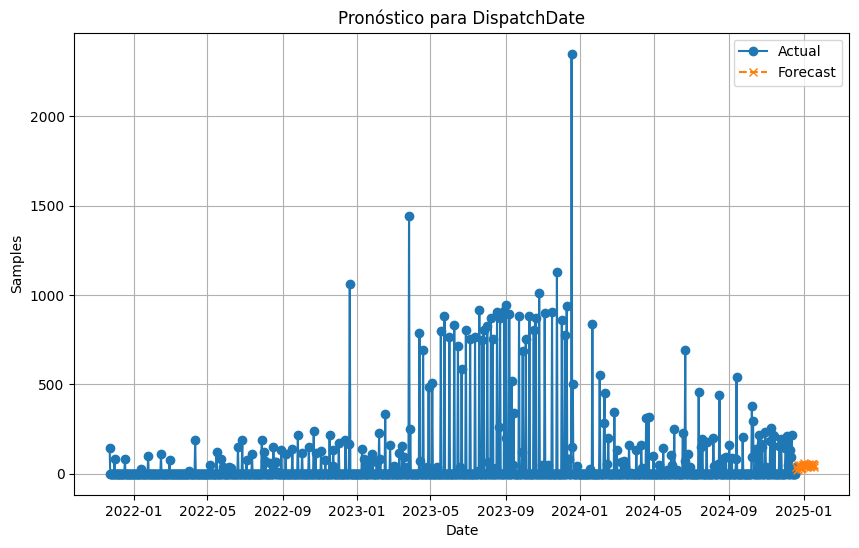

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para ReceivedDate:
        Date    TimeGPT
0 2024-12-19  68.428520
1 2024-12-20  59.615143
2 2024-12-21  54.368470
3 2024-12-22  50.825157
4 2024-12-23  54.295450
Efectividad del pronóstico para ReceivedDate: {'MAE': 83.15975279999999, 'MSE': 10292.065784401642, 'RMSE': np.float64(101.4498190456821)}


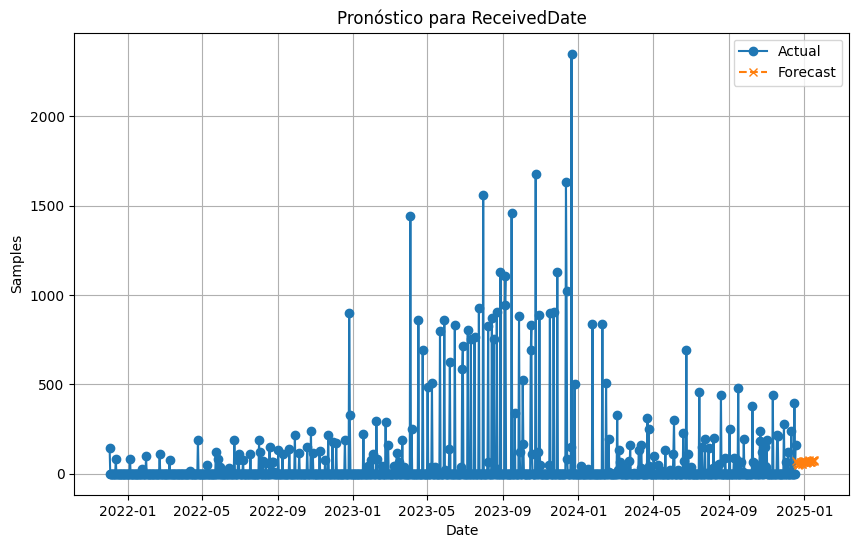

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para ResultDate:
        Date    TimeGPT
0 2025-01-03  39.733730
1 2025-01-04  31.618368
2 2025-01-05  31.107548
3 2025-01-06  35.301483
4 2025-01-07  38.877495
Efectividad del pronóstico para ResultDate: {'MAE': 45.92317576666667, 'MSE': 2635.198693669715, 'RMSE': np.float64(51.33418640311459)}


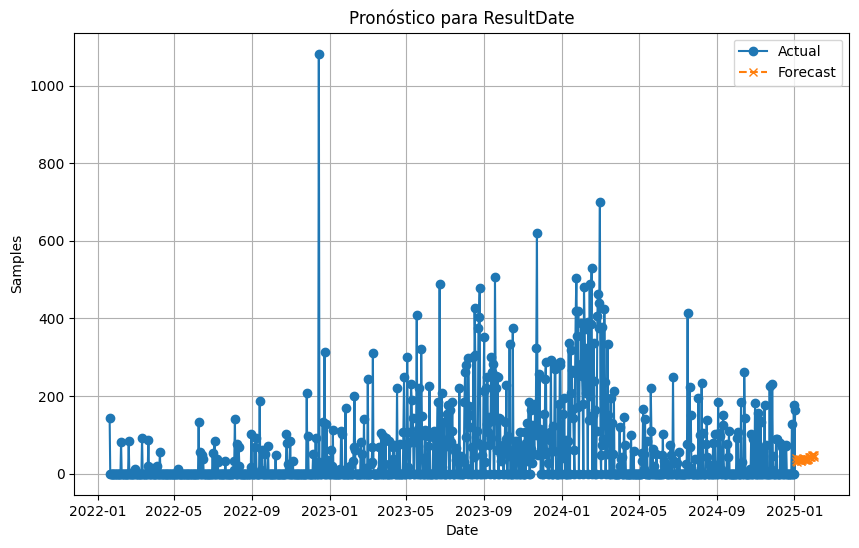

In [11]:
import pandas as pd
import subprocess
import sys
import matplotlib.pyplot as plt

# Asegurarse de que el paquete 'nixtla' esté instalado
try:
    from nixtla import NixtlaClient
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nixtla"])
    from nixtla import NixtlaClient

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Inicializar el cliente de Nixtla con tu clave API
nixtla_client = NixtlaClient(api_key='nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc')

# Definir una función para predecir una serie temporal
def forecast_time_series(dataframe, date_col, target_col, horizon=30, freq='D'):
    # Asegurarse de que las fechas estén en formato datetime
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])

    # Preparar los datos para TimeGPT
    forecast_df = nixtla_client.forecast(
        dataframe,
        h=horizon,
        freq=freq,
        time_col=date_col,
        target_col=target_col
    )
    return forecast_df

# Definir una función para evaluar la efectividad del pronóstico
def evaluate_forecast(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

# Definir una función para rellenar fechas faltantes y agregar continuidad en la serie temporal
def prepare_time_series(dataframe, date_col, target_col):
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])
    dataframe = dataframe.groupby(date_col).agg({target_col: 'sum'}).reset_index()
    dataframe = dataframe.set_index(date_col).asfreq('D', fill_value=0).reset_index()
    dataframe.columns = ['Date', 'Samples']  # Renombrar las columnas para estandarizar
    return dataframe

# Definir una función para graficar resultados
def plot_forecast(series_data, forecast, title):
    plt.figure(figsize=(10, 6))
    plt.plot(series_data['Date'], series_data['Samples'], label='Actual', marker='o')
    plt.plot(forecast['Date'], forecast['TimeGPT'], label='Forecast', linestyle='--', marker='x')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Samples')
    plt.legend()
    plt.grid()
    plt.show()

# Cargar los datos del archivo
file_path = 'Geochemical Checklist.csv'
data = pd.read_csv(file_path)

# Preparar las series de tiempo reales
dispatch_time_series = prepare_time_series(data, 'DispatchDate', 'Total Sample SE')
received_time_series = prepare_time_series(data, 'ReceivedDate', 'Total Sample SE')
result_time_series = prepare_time_series(data, 'ResultDate', 'Total Sample SE')

# Preparar las tres series de tiempo
series_dict = {
    "DispatchDate": dispatch_time_series,
    "ReceivedDate": received_time_series,
    "ResultDate": result_time_series
}

# Pronosticar para las tres series
forecasts = {}
for series_name, series_data in series_dict.items():
    forecast = forecast_time_series(
        series_data,  # Ya contiene datos rellenados y uniformes
        date_col="Date",
        target_col="Samples"
    )
    forecasts[series_name] = forecast

    # Verificar el contenido del pronóstico
    print(f"Contenido del pronóstico para {series_name}:")
    print(forecast.head())

    # Evaluar la efectividad del pronóstico (si se tienen datos reales para comparar)
    if 'TimeGPT' in forecast.columns:
        actual = series_data['Samples'][-len(forecast):]
        predicted = forecast['TimeGPT']
        metrics = evaluate_forecast(actual, predicted)

        print(f"Efectividad del pronóstico para {series_name}: {metrics}")

    # Graficar resultados
    plot_forecast(series_data, forecast, f"Pronóstico para {series_name}")

# Nota: Reemplaza 'nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc' con tu clave de TimeGPT para que el código funcione correctamente.


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para DispatchDate:
        Date    TimeGPT
0 2024-12-20  35.795490
1 2024-12-21  23.133970
2 2024-12-22  26.894438
3 2024-12-23  46.337574
4 2024-12-24  42.279780
Efectividad del pronóstico para DispatchDate: {'MAE': 54.90485599999998, 'MSE': 5304.7981614555265, 'RMSE': np.float64(72.83404534594743)}


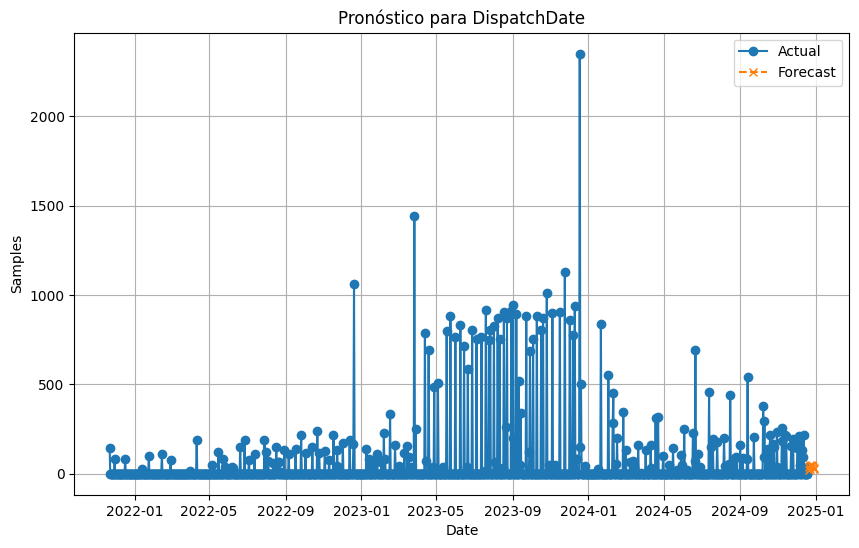

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para ReceivedDate:
        Date    TimeGPT
0 2024-12-19  68.428520
1 2024-12-20  59.615143
2 2024-12-21  54.368470
3 2024-12-22  50.825157
4 2024-12-23  54.295450
Efectividad del pronóstico para ReceivedDate: {'MAE': 103.01761689999998, 'MSE': 17725.18684692389, 'RMSE': np.float64(133.1359712734462)}


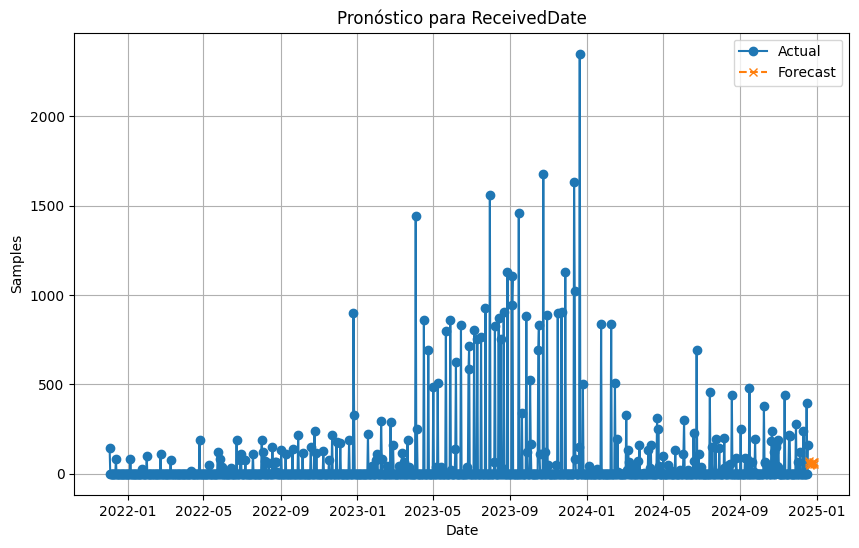

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para ResultDate:
        Date    TimeGPT
0 2025-01-03  39.733730
1 2025-01-04  31.618368
2 2025-01-05  31.107548
3 2025-01-06  35.301483
4 2025-01-07  38.877495
Efectividad del pronóstico para ResultDate: {'MAE': 60.5034525, 'MSE': 5306.081490803781, 'RMSE': np.float64(72.84285476835583)}


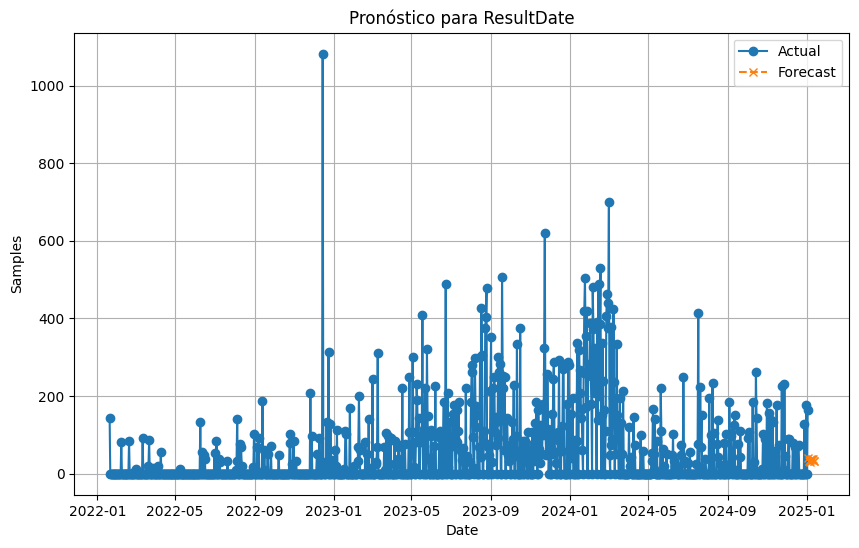

In [12]:
import pandas as pd
import subprocess
import sys
import matplotlib.pyplot as plt

# Asegurarse de que el paquete 'nixtla' esté instalado
try:
    from nixtla import NixtlaClient
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nixtla"])
    from nixtla import NixtlaClient

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Inicializar el cliente de Nixtla con tu clave API
nixtla_client = NixtlaClient(api_key='nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc')

# Definir una función para predecir una serie temporal
def forecast_time_series(dataframe, date_col, target_col, horizon=10, freq='D'):
    # Asegurarse de que las fechas estén en formato datetime
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])

    # Preparar los datos para TimeGPT
    forecast_df = nixtla_client.forecast(
        dataframe,
        h=horizon,
        freq=freq,
        time_col=date_col,
        target_col=target_col
    )
    return forecast_df

# Definir una función para evaluar la efectividad del pronóstico
def evaluate_forecast(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

# Definir una función para rellenar fechas faltantes y agregar continuidad en la serie temporal
def prepare_time_series(dataframe, date_col, target_col):
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])
    dataframe = dataframe.groupby(date_col).agg({target_col: 'sum'}).reset_index()
    dataframe = dataframe.set_index(date_col).asfreq('D', fill_value=0).reset_index()
    dataframe.columns = ['Date', 'Samples']  # Renombrar las columnas para estandarizar
    return dataframe

# Definir una función para graficar resultados
def plot_forecast(series_data, forecast, title):
    plt.figure(figsize=(10, 6))
    plt.plot(series_data['Date'], series_data['Samples'], label='Actual', marker='o')
    plt.plot(forecast['Date'], forecast['TimeGPT'], label='Forecast', linestyle='--', marker='x')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Samples')
    plt.legend()
    plt.grid()
    plt.show()

# Cargar los datos del archivo
file_path = 'Geochemical Checklist.csv'
data = pd.read_csv(file_path)

# Preparar las series de tiempo reales
dispatch_time_series = prepare_time_series(data, 'DispatchDate', 'Total Sample SE')
received_time_series = prepare_time_series(data, 'ReceivedDate', 'Total Sample SE')
result_time_series = prepare_time_series(data, 'ResultDate', 'Total Sample SE')

# Preparar las tres series de tiempo
series_dict = {
    "DispatchDate": dispatch_time_series,
    "ReceivedDate": received_time_series,
    "ResultDate": result_time_series
}

# Pronosticar para las tres series
forecasts = {}
for series_name, series_data in series_dict.items():
    forecast = forecast_time_series(
        series_data,  # Ya contiene datos rellenados y uniformes
        date_col="Date",
        target_col="Samples"
    )
    forecasts[series_name] = forecast

    # Verificar el contenido del pronóstico
    print(f"Contenido del pronóstico para {series_name}:")
    print(forecast.head())

    # Evaluar la efectividad del pronóstico (si se tienen datos reales para comparar)
    if 'TimeGPT' in forecast.columns:
        actual = series_data['Samples'][-len(forecast):]
        predicted = forecast['TimeGPT']
        metrics = evaluate_forecast(actual, predicted)

        print(f"Efectividad del pronóstico para {series_name}: {metrics}")

    # Graficar resultados
    plot_forecast(series_data, forecast, f"Pronóstico para {series_name}")

# Nota: Reemplaza 'nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc' con tu clave de TimeGPT para que el código funcione correctamente.


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para DispatchDate:
        Date   TimeGPT
0 2024-12-20  50.41666
1 2024-12-21  39.97430
2 2024-12-22  43.45023
3 2024-12-23  59.77675
4 2024-12-24  52.47706
Efectividad del pronóstico para DispatchDate: {'MAE': 66.58273573333334, 'MSE': 6049.428722492104, 'RMSE': np.float64(77.77807353291867)}


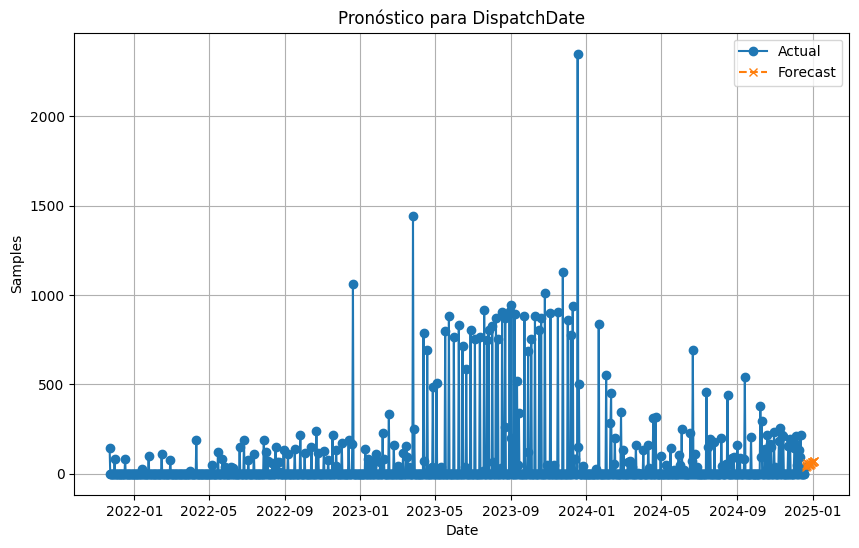

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para ReceivedDate:
        Date    TimeGPT
0 2024-12-19  69.823784
1 2024-12-20  54.705395
2 2024-12-21  48.858707
3 2024-12-22  45.609210
4 2024-12-23  51.930084
Efectividad del pronóstico para ReceivedDate: {'MAE': 89.44824039999999, 'MSE': 12110.568233145876, 'RMSE': np.float64(110.04802693890461)}


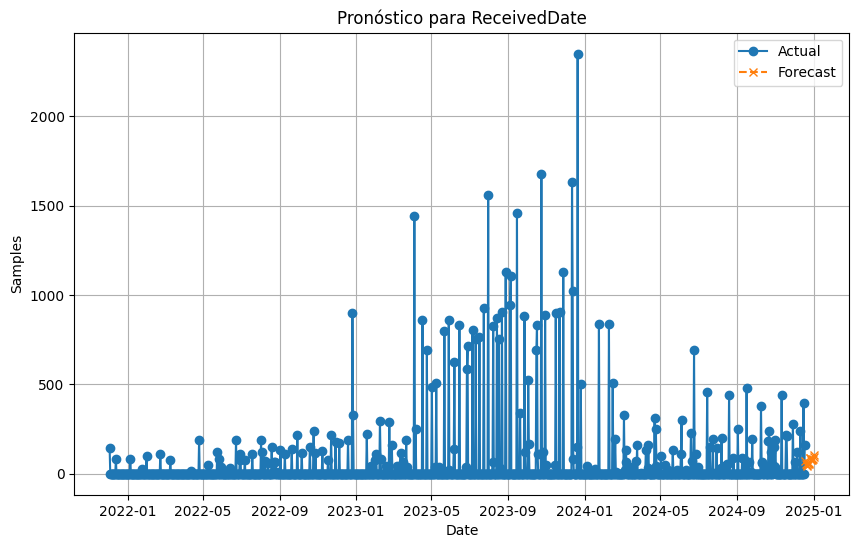

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Contenido del pronóstico para ResultDate:
        Date    TimeGPT
0 2025-01-03  46.978530
1 2025-01-04  38.433495
2 2025-01-05  39.242043
3 2025-01-06  43.660400
4 2025-01-07  49.121536
Efectividad del pronóstico para ResultDate: {'MAE': 57.914609866666666, 'MSE': 3828.521165287736, 'RMSE': np.float64(61.87504476998571)}


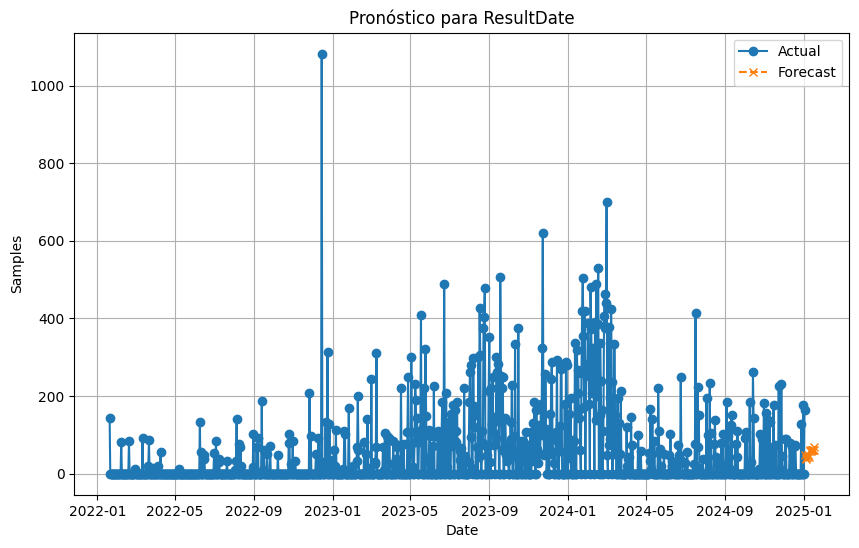

In [14]:
import pandas as pd
import subprocess
import sys
import matplotlib.pyplot as plt

# Asegurarse de que el paquete 'nixtla' esté instalado
try:
    from nixtla import NixtlaClient
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nixtla"])
    from nixtla import NixtlaClient

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Inicializar el cliente de Nixtla con tu clave API
nixtla_client = NixtlaClient(api_key='nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc')

# Definir una función para predecir una serie temporal
# Se agregan parámetros para ajustar el modelo de TimeGPT
def forecast_time_series(dataframe, date_col, target_col, horizon=30, freq='D', model='timegpt-1', finetune_steps=10):
    # Asegurarse de que las fechas estén en formato datetime
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])

    # Preparar los datos para TimeGPT con ajustes avanzados
    forecast_df = nixtla_client.forecast(
        dataframe,
        h=horizon,
        freq=freq,
        time_col=date_col,
        target_col=target_col,
        model=model,  # Modelo que se va a usar
        finetune_steps=finetune_steps,  # Pasos para el ajuste fino del modelo
        finetune_loss='mse'  # Usar MSE como función de pérdida para optimizar
    )
    return forecast_df

# Definir una función para evaluar la efectividad del pronóstico
def evaluate_forecast(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

# Definir una función para rellenar fechas faltantes y agregar continuidad en la serie temporal
def prepare_time_series(dataframe, date_col, target_col):
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])
    dataframe = dataframe.groupby(date_col).agg({target_col: 'sum'}).reset_index()
    dataframe = dataframe.set_index(date_col).asfreq('D', fill_value=0).reset_index()
    dataframe.columns = ['Date', 'Samples']  # Renombrar las columnas para estandarizar
    return dataframe

# Definir una función para graficar resultados
def plot_forecast(series_data, forecast, title):
    plt.figure(figsize=(10, 6))
    plt.plot(series_data['Date'], series_data['Samples'], label='Actual', marker='o')
    plt.plot(forecast['Date'], forecast['TimeGPT'], label='Forecast', linestyle='--', marker='x')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Samples')
    plt.legend()
    plt.grid()
    plt.show()

# Cargar los datos del archivo
file_path = 'Geochemical Checklist.csv'
data = pd.read_csv(file_path)

# Preparar las series de tiempo reales
dispatch_time_series = prepare_time_series(data, 'DispatchDate', 'Total Sample SE')
received_time_series = prepare_time_series(data, 'ReceivedDate', 'Total Sample SE')
result_time_series = prepare_time_series(data, 'ResultDate', 'Total Sample SE')

# Preparar las tres series de tiempo
series_dict = {
    "DispatchDate": dispatch_time_series,
    "ReceivedDate": received_time_series,
    "ResultDate": result_time_series
}

# Pronosticar para las tres series
forecasts = {}
for series_name, series_data in series_dict.items():
    forecast = forecast_time_series(
        series_data,  # Ya contiene datos rellenados y uniformes
        date_col="Date",
        target_col="Samples",
        horizon=15,  # Reducir el horizonte para mejorar precisión
        finetune_steps=20  # Más pasos de ajuste fino
    )
    forecasts[series_name] = forecast

    # Verificar el contenido del pronóstico
    print(f"Contenido del pronóstico para {series_name}:")
    print(forecast.head())

    # Evaluar la efectividad del pronóstico (si se tienen datos reales para comparar)
    if 'TimeGPT' in forecast.columns:
        actual = series_data['Samples'][-len(forecast):]
        predicted = forecast['TimeGPT']
        metrics = evaluate_forecast(actual, predicted)

        print(f"Efectividad del pronóstico para {series_name}: {metrics}")

    # Graficar resultados
    plot_forecast(series_data, forecast, f"Pronóstico para {series_name}")

# Nota: Reemplaza 'nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc' con tu clave de TimeGPT para que el código funcione correctamente.